### This notebook is for data exploration, and for manually compiling basic data descriptors.

Mainly, we want to look at general charasteristics of celldata. These include various overall and group statistics: Pairwise correlations, variance, mean fold-change, group means. 

In [43]:
import numpy as np
from numpy.matlib import repmat
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, "../code/utils")
from correlation_test import *
from celldata import *

We are only interested in celldata for the moment

In [4]:
path_out = '../results/data_basics/'
path = '../../../PDproj/celldata/datawithGFstatus/clean/'
filenames = [line.rstrip() for line in open(path +'filenames.txt')][:-4]
filenames

['cellshilicnegGFstatus.csv',
 'cellshilicposGFstatus.csv',
 'cellslipidnegGFstatus.csv',
 'cellslipidposGFstatus.csv',
 'cellsRPnegGFstatus.csv',
 'cellsRPposGFstatus.csv']

In [133]:
# SET FILE NUMBER and FILE NAME
fnum=4
data = compile_ttest_features(path,filenames[fnum])
area = data['AREA']
fname = filenames[fnum].split('GF')[0]
print("mode: " + fname)
# get the order of the groups
group_inds = np.array([np.arange(10), np.arange(10,20), np.arange(20,30), np.arange(30,40)])
data['GROUPS'][[0,11,21,31]]

Reading data from: ../../../PDproj/celldata/datawithGFstatus/clean/cellsRPnegGFstatus.csv
mode: cellsRPneg


array(['aSYN', 'comb.', 'INFg', 'UT'], dtype='<U5')

Calculate feature and group means, variances:

In [134]:
area_aSYN = area[:,group_inds[0]]
area_comb = area[:,group_inds[1]]
area_IFNg = area[:,group_inds[2]]
area_UT = area[:,group_inds[3]]

In [135]:
mean_aSYN = np.mean(area_aSYN, axis=1)
mean_comb = np.mean(area_comb, axis=1)
mean_IFNg = np.mean(area_IFNg, axis=1)
mean_UT = np.mean(area_UT, axis=1)

var_aSYN = np.var(area_aSYN, axis=1)
var_comb = np.var(area_comb, axis=1)
var_IFNg = np.var(area_IFNg, axis=1)
var_UT = np.var(area_UT, axis=1)

mean_overall = np.mean(area, axis=1)
var_overall = np.var(area, axis=1)

testXY=compile_pairwise_comparisons(area, group_inds)[0]
fc = testXY[:,0:10].mean(axis=1) - testXY[:,10:20].mean(axis=1)
result_correlation_test = test_correlation_parallel(area, alpha=0.05, keep_dims=False)

Running on 16 cores

Time elapsed:  8.575000524520874


In [148]:
cor_testXY = np.corrcoef(testXY)[np.triu_indices(testXY.shape[0],1)].flatten()

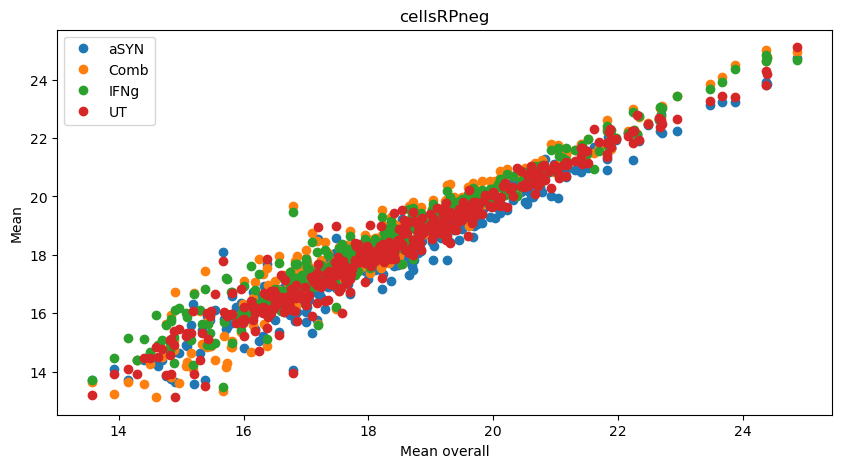

In [136]:
plt.figure(figsize=(10,5))
plt.plot(mean_overall, mean_aSYN, 'o', label='aSYN')
plt.plot(mean_overall, mean_comb, 'o', label='Comb')
plt.plot(mean_overall, mean_IFNg, 'o', label='IFNg')
plt.plot(mean_overall, mean_UT, 'o', label='UT')
plt.xlabel('Mean overall')
plt.ylabel('Mean')
plt.title(fname)
plt.legend()
plt.show()

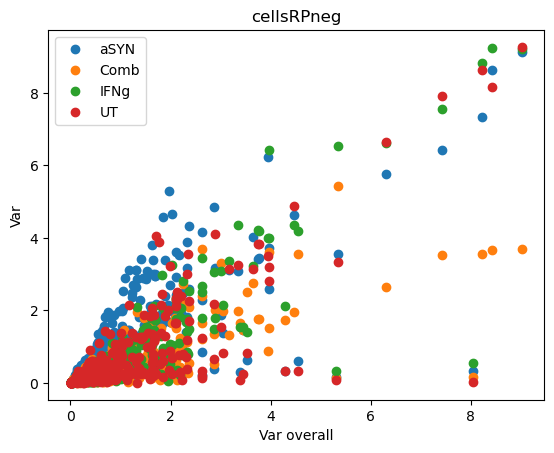

In [137]:
plt.plot(var_overall, var_aSYN, 'o', label='aSYN')
plt.plot(var_overall, var_comb, 'o', label='Comb')
plt.plot(var_overall, var_IFNg, 'o', label='IFNg')
plt.plot(var_overall, var_UT, 'o', label='UT')
plt.xlabel('Var overall')
plt.ylabel('Var')
plt.title(fname)
plt.legend()
plt.show()

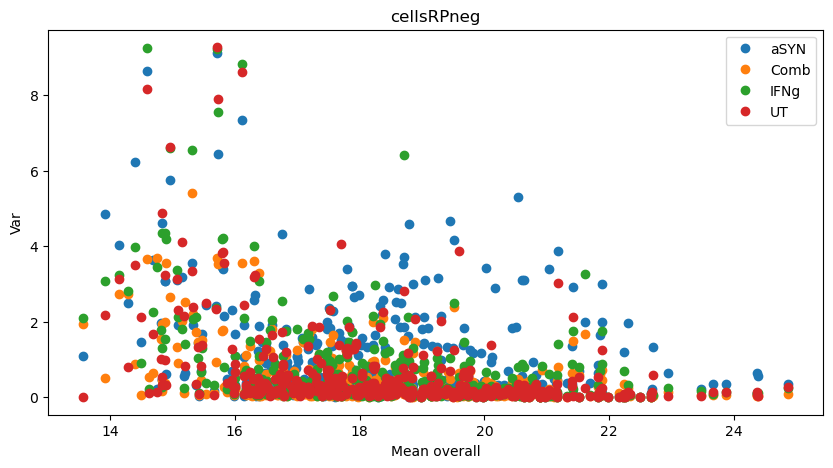

In [138]:
# Are means and variances correlated?
plt.figure(figsize=(10,5))
plt.plot(mean_overall, var_aSYN, 'o', label='aSYN')
plt.plot(mean_overall, var_comb, 'o', label='Comb')
plt.plot(mean_overall, var_IFNg, 'o', label='IFNg')
plt.plot(mean_overall, var_UT, 'o', label='UT')
plt.xlabel('Mean overall')
plt.ylabel('Var')
plt.title(fname)
plt.legend()
plt.show()

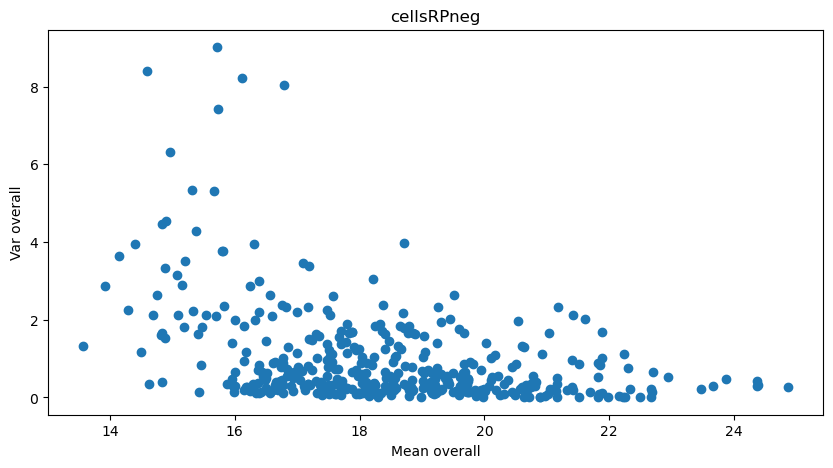

In [139]:
# are overall means and variances correlated?
plt.figure(figsize=(10,5))
plt.plot(mean_overall, var_overall, 'o')
plt.xlabel('Mean overall')
plt.ylabel('Var overall')
plt.title(fname)
plt.show()

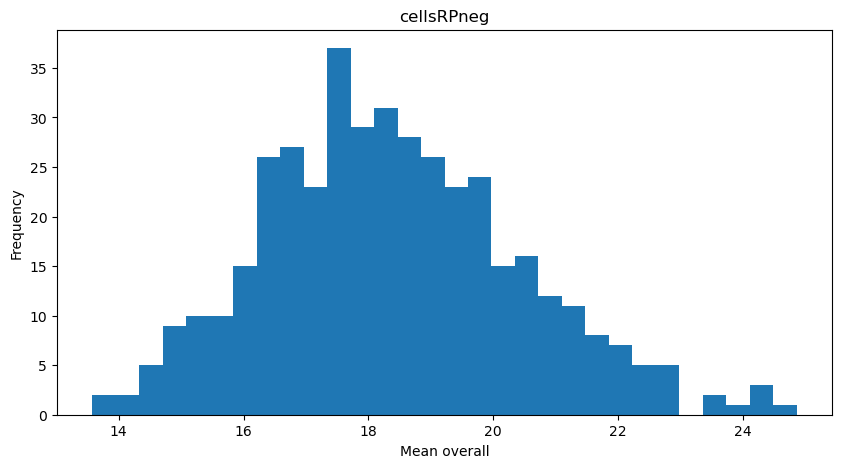

In [140]:
# oveall mean hist
plt.figure(figsize=(10,5))
plt.hist(mean_overall, bins=30)
plt.xlabel('Mean overall')
plt.ylabel('Frequency')
plt.title(fname)
plt.show()

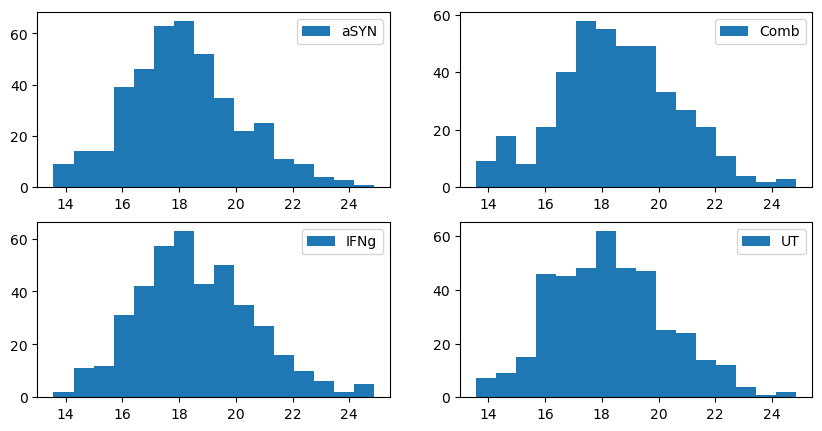

In [141]:
# plot mean histograms using same bins defined by the overall data
bins = np.histogram_bin_edges(mean_overall, bins='auto')
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.hist(mean_aSYN, bins, label='aSYN')
plt.legend()
plt.subplot(2,2,2)
plt.hist(mean_comb, bins, label='Comb')
plt.legend()
plt.subplot(2,2,3)
plt.hist(mean_IFNg, bins, label='IFNg')
plt.legend()
plt.subplot(2,2,4)
plt.hist(mean_UT, bins, label='UT')
plt.legend()
plt.show()


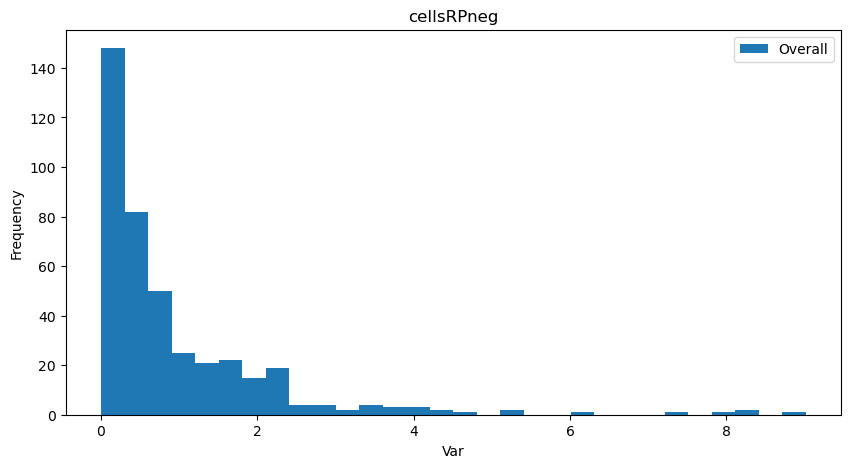

In [142]:
# same for var
plt.figure(figsize=(10,5))
plt.hist(var_overall, bins=30, label='Overall')
plt.xlabel('Var')
plt.ylabel('Frequency')
plt.title(fname)
plt.legend()
plt.show()

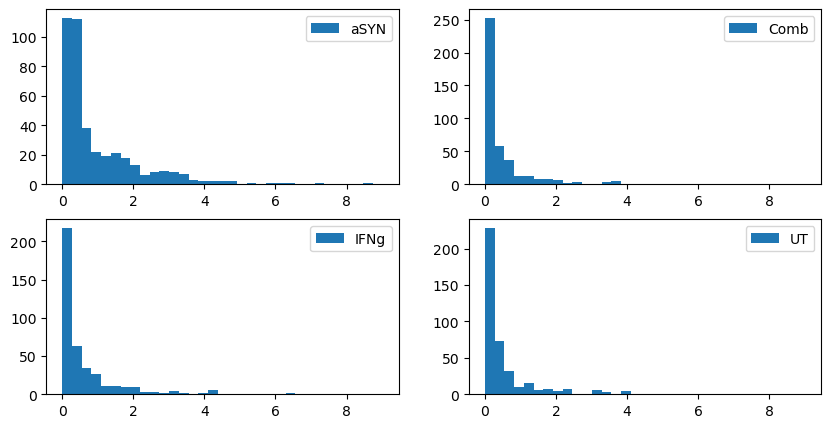

In [143]:
# same for variances
bins = np.histogram_bin_edges(var_overall, bins='auto')
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.hist(var_aSYN, bins, label='aSYN')
plt.legend()
plt.subplot(2,2,2)
plt.hist(var_comb, bins, label='Comb')
plt.legend()
plt.subplot(2,2,3)
plt.hist(var_IFNg, bins, label='IFNg')
plt.legend()
plt.subplot(2,2,4)
plt.hist(var_UT, bins, label='UT')
plt.legend()
plt.show()



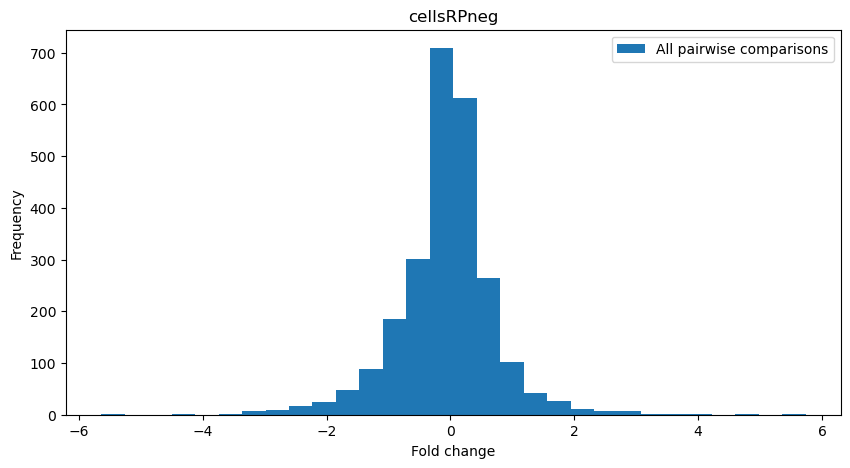

In [144]:
# histogram of fold change
plt.figure(figsize=(10,5))
plt.hist(fc, bins=30, label='All pairwise comparisons')
plt.xlabel('Fold change')
plt.ylabel('Frequency')
plt.title(fname)
plt.legend()
plt.show()

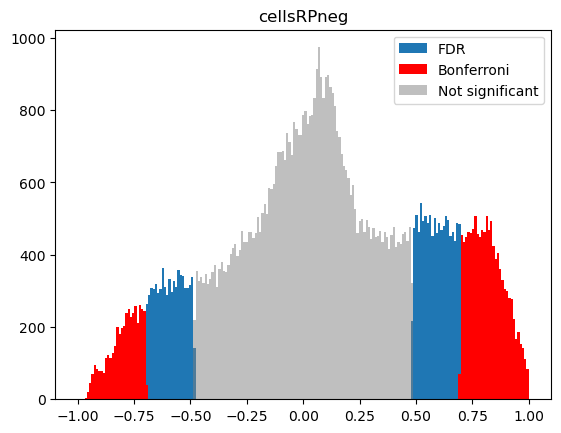

In [145]:
fdr_mask = result_correlation_test['p_FDR'] <= 0.05
bonferroni_mask = result_correlation_test['pvalues'] <= result_correlation_test['alphacBonf']
bins=np.linspace(-1,1,200)
plt.hist(result_correlation_test['corrcoef'][fdr_mask], bins=bins)
plt.hist(result_correlation_test['corrcoef'][bonferroni_mask], bins=bins, color='r')
plt.hist(result_correlation_test['corrcoef'][~fdr_mask], bins=bins, color='gray', alpha=0.5)
plt.legend(['FDR', 'Bonferroni', 'Not significant'])
#plt.title("Number of correlations significantly different from 0\n with multiplicity corrrection: {} ({}%)".format(np.sum(fdr_mask),
#                                                                                                             np.sum(fdr_mask)/result_correlation_test['corrcoef'].shape))
plt.title(fname)
plt.show()

In [146]:
# proportion of negative significant correlations to positive significant correlations
prop_neg_to_pos = np.sum(result_correlation_test['corrcoef'][fdr_mask] < 0) / np.sum(result_correlation_test['corrcoef'][fdr_mask] > 0)
print("Proportion of negative significant correlations to positive significant correlations: {}".format(np.round(prop_neg_to_pos, 2)))

Proportion of negative significant correlations to positive significant correlations: 0.52


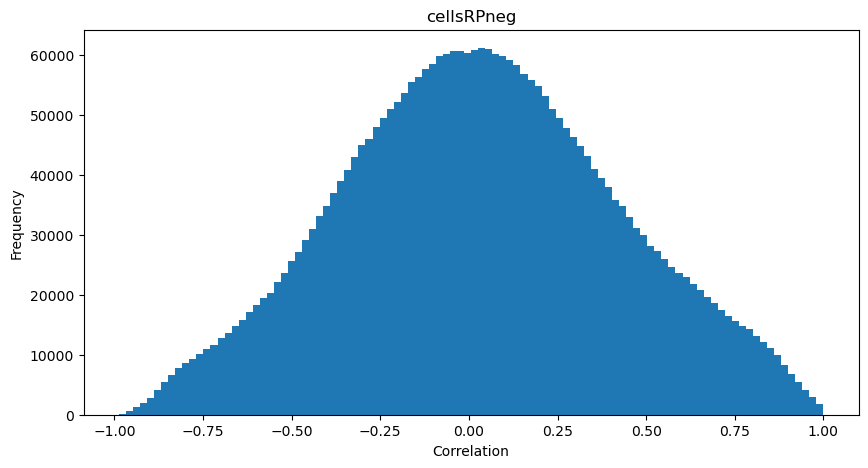

In [151]:
# plot cor_testXY -- i.e., correlation between all pairwise comparisons
plt.figure(figsize=(10,5))
plt.hist(cor_testXY, bins=100)
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title(fname)
plt.show()